<a href="https://colab.research.google.com/github/TaniaF2021/Predictive-analytics/blob/main/Copy_of_ML_KNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

** Data Aggregation**

In [ ]:
new_df= df['age']
new_df

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
new_col=df['age']

type(new_col)

pandas.core.series.Series

In [ ]:
subset=df[['age','cp','trestbps','chol','thalach','target']]
subset.head()

,age,cp,trestbps,chol,thalach,target
0,63,3,145,233,150,1
1,37,2,130,250,187,1
2,41,1,130,204,172,1
3,56,1,120,236,178,1
4,57,0,120,354,163,1


In [ ]:
subset.corr()

,age,cp,trestbps,chol,thalach,target
age,1.000000,-0.068653,0.279351,0.213678,-0.398522,-0.225439
cp,-0.068653,1.000000,0.047608,-0.076904,0.295762,0.433798
trestbps,0.279351,0.047608,1.000000,0.123174,-0.046698,-0.144931
chol,0.213678,-0.076904,0.123174,1.000000,-0.009940,-0.085239
thalach,-0.398522,0.295762,-0.046698,-0.009940,1.000000,0.421741
target,-0.225439,0.433798,-0.144931,-0.085239,0.421741,1.000000


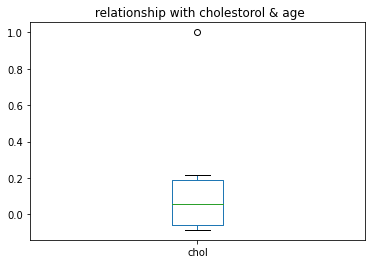

In [ ]:
subset.corr().plot(kind='box', x='age', y='chol', title =' relationship with cholestorol & age');

In [ ]:
subset.quantile()

age          55.0
cp            1.0
trestbps    130.0
chol        240.0
thalach     153.0
target        1.0
Name: 0.5, dtype: float64

In [ ]:
subset.max()

age          77
cp            3
trestbps    200
chol        564
thalach     202
target        1
dtype: int64

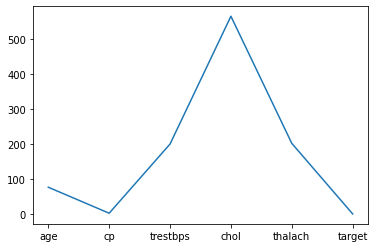

In [ ]:
subset.max().plot()

In [ ]:
subset.min()

age          29
cp            0
trestbps     94
chol        126
thalach      71
target        0
dtype: int64

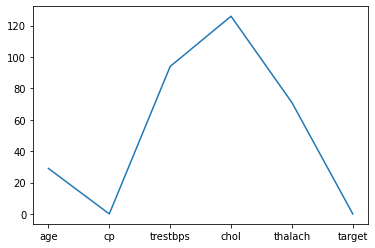

In [ ]:
subset.min().plot()

In [ ]:
subset.head()

,age,cp,trestbps,chol,thalach,target
0,63,3,145,233,150,1
1,37,2,130,250,187,1
2,41,1,130,204,172,1
3,56,1,120,236,178,1
4,57,0,120,354,163,1


In [ ]:
X = subset[['age', 'cp', 'trestbps','chol','thalach','target']]
X

,age,cp,trestbps,chol,thalach,target
0,63,3,145,233,150,1
1,37,2,130,250,187,1
2,41,1,130,204,172,1
3,56,1,120,236,178,1
4,57,0,120,354,163,1
...,...,...,...,...,...,...
298,57,0,140,241,123,0
299,45,3,110,264,132,0
300,68,0,144,193,141,0
301,57,0,130,131,115,0


Machine Modelling for KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(subset.drop('target', axis=1))
scaled_features = scalar.transform(subset.drop('target', axis=1))
std_data = pd.DataFrame(scaled_features, columns=subset.columns[:-1])


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, subset['target'])

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 5)
(76, 5)
(227,)
(76,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 14],
       [15, 23]])

In [ ]:
score = knn.score(x_test,y_test)

In [ ]:
score

0.618421052631579

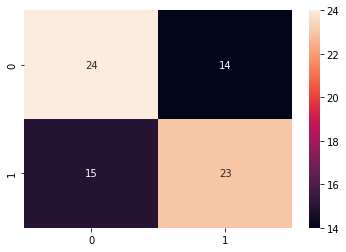

In [ ]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62        38
           1       0.62      0.61      0.61        38

    accuracy                           0.62        76
   macro avg       0.62      0.62      0.62        76
weighted avg       0.62      0.62      0.62        76



In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=29)

In [ ]:
knn5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
y_pred_knn5 = knn5.predict(x_test)

In [ ]:
y_pred_knn5

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
score_knn5 = knn5.score(x_test,y_test)
score_knn5

0.7763157894736842

In [ ]:
import numpy as np

In [ ]:
from sklearn import metrics

In [ ]:
score = []

In [ ]:
for i in range(1,30):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.618421052631579, 0.5394736842105263, 0.7368421052631579, 0.6710526315789473, 0.7763157894736842, 0.7368421052631579, 0.75, 0.7368421052631579, 0.7631578947368421, 0.7236842105263158, 0.7236842105263158, 0.7236842105263158, 0.7236842105263158, 0.6973684210526315, 0.7631578947368421, 0.75, 0.7763157894736842, 0.7763157894736842, 0.7763157894736842, 0.7631578947368421, 0.7763157894736842, 0.7631578947368421, 0.7763157894736842, 0.7763157894736842, 0.7763157894736842, 0.7763157894736842, 0.7763157894736842, 0.7631578947368421, 0.7763157894736842]


Text(0, 0.5, 'Accuracy Score')

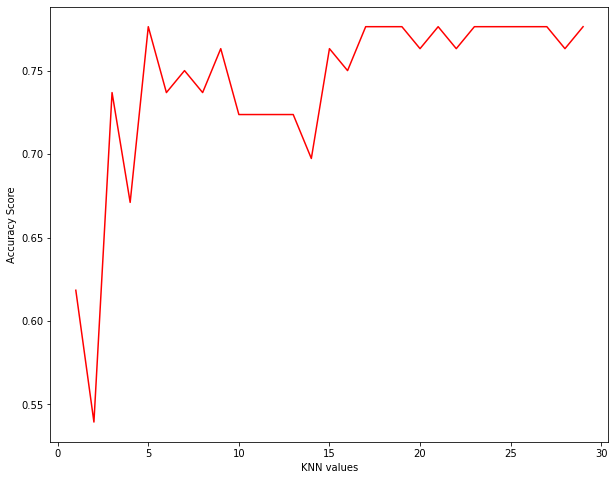

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,30), score, color='red')
plt.xlabel('KNN values')
plt.ylabel('Accuracy Score')

In [ ]:
error_rate = []
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

(Text(0, 0.5, 'Eror Rate'),)

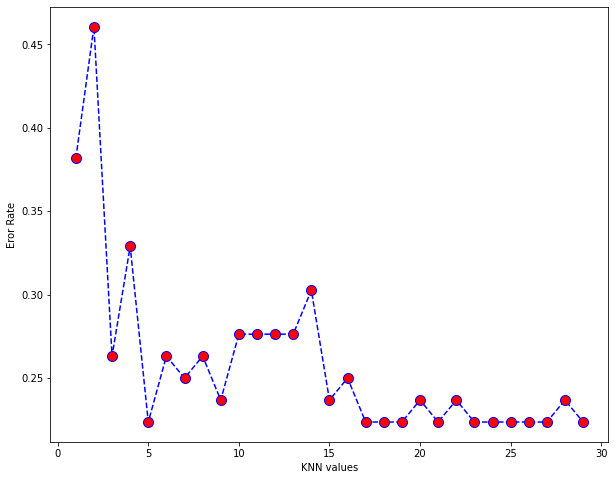

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'), 

**CONCLUSION**

In conclusion the highest KNN accuracy range is 30 where the score is 
0.7763157894736842 which is the highest and the lowest on error score.
therefore, one can conclude that the model is fairly suitable for this data set.

According the classification report the relationship between the input variables and the output variable is about .62 which is not enough to determine any reasonable conclusion if heartaches are caused by one particular variable or if its caused by a group of variables. More data is needed to conclude this.
